# Concrete Strength Prediction using Rsndom Forest

This notebook analyzes concrete strength dats and builds a Random Forest model to predict concrete strength based pn various components

## 1. Import Required Libraries

Import pandas, numpy, matplotlib, seaborn and sklearn libraries for data manipulation, visualization, and machine learning

In [27]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

# set style for plots
plt.style.use('seaborn-v0_8')

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

Use pandas to load the training and test datasets from CSV files.

In [28]:
# Load the datasets
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')
sample_submssion = pd.read_csv('datasets/sample_submission.csv')

print(f"Trainign data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")
print(f"Sample submission selection shape: {sample_submssion.shape}")

# Display first few rows of training data
print("\nFirst 5 rows of training data:")
train_df.head()

Trainign data shape: (5407, 10)
Test data shape: (3605, 9)
Sample submission selection shape: (3605, 2)

First 5 rows of training data:


,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19


## 5. Data Preprocessing

Handle missing values, encode categorical variables, and preprare features for the Random Forest model.

In [29]:
# for component in ['BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent']:
#     train_df.loc[train_df[component] != 0, f'{component}_used'] = 1
#     train_df[f'{component}_used'] = train_df[f'{component}_used'].fillna(0)
#     train_df[f'{component}_used'] = train_df[f'{component}_used'].astype(int)

#     test_df.loc[test_df[component] != 0, f'{component}_used'] = 1
#     test_df[f'{component}_used'] = test_df[f'{component}_used'].fillna(0)
#     test_df[f'{component}_used'] = test_df[f'{component}_used'].astype(int)

In [30]:
# Check for missing values again
print("Missng values in training data:")
print(train_df.isnull().sum())
print('\nMissing values in test data:')
print(test_df.isnull().sum())

# Since there are no missing values, we proceed to feature selection
# Preprare features and target
X = train_df.drop(['id', 'Strength'], axis=1)
y = train_df['Strength']
X_test = test_df.drop(['id'], axis=1)

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Test feature matrix shape: {X_test.shape}")

print("\nFeature columsns:")
print(X.columns.tolist())

Missng values in training data:
id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

Missing values in test data:
id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
dtype: int64

Feature matrix shape: (5407, 8)
Target vector shape: (5407,)
Test feature matrix shape: (3605, 8)

Feature columsns:
['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent', 'WaterComponent', 'SuperplasticizerComponent', 'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']


In [31]:
# Random Forest doesn't require feature scaling, but we'll keep the option
# For Random Forest, we'll use the original features without scaling
print("Random Forest can work with original features without scaling.")
print("Using original features for Random Forest model.")

# Keep the original features for Random Forest
X_final = X.copy()
X_test_final = X_test.copy()

print(f"\ntraining features shape: {X_final.shape}")
print(f"Test features shape: {X_test.shape}")

# Display first few rows of features
print("\nfirst 5 rows of features:")
X_final.head()

Random Forest can work with original features without scaling.
Using original features for Random Forest model.

training features shape: (5407, 8)
Test features shape: (3605, 8)

first 5 rows of features:


,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90


## 6. Split Data into Train and Test Sets

Separate features and target variables, and split the training data for model validation

In [32]:
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y, test_size=0.8, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation set shape: {y_val.shape}")

print(f"\nTraining set percentage: {len(X_train) / len(X_final) * 100:.2f}%")
print(f"Validation set percentage: {len(X_val) / len(X_final) * 100:.2f}%")

Training set shape: (1081, 8)
Validation set shape: (4326, 8)
Training target shape: (1081,)
Validation set shape: (4326,)

Training set percentage: 19.99%
Validation set percentage: 80.01%


## 7. Train Random Forest Model

Create and train a Random Forest model using sklearn, and evaluate its performance on validation data

In [33]:
# Create and train the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=100,        # Number of trees
    max_depth=5,             # Maximum depth of trees
    min_samples_split=2,     # Minimum samples required to split
    min_samples_leaf=1,      # Minimum samples required at leaf node
    random_state=42,         # For reproducibility
    n_jobs=1                 # Use all available cores
)

rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")
print(f"Number of trees: {rf_model.n_estimators}")
print(f"Feature importance shape: {rf_model.feature_importances_.shape}")

# Make predictions on validation set
y_val_pred = rf_model.predict(X_val)

# Calculate metrics
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"\nModel Performance on Validation Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Random Forest model trained successfully!
Number of trees: 100
Feature importance shape: (8,)

Model Performance on Validation Set:
Mean Squared Error (MSE): 149.1810
Root Mean Squared Error (RMSE): 12.2140
Mean Absolute Error (MAE): 9.4881
R² Score: 0.4447


Feature Importance (Random Forest):
                     Feature  Importance
7                  AgeInDays    0.623075
0            CementComponent    0.118194
4  SuperplasticizerComponent    0.083568
3             WaterComponent    0.068028
5   CoarseAggregateComponent    0.040108
6     FineAggregateComponent    0.035559
1           BlastFurnaceSlag    0.016537
2            FlyAshComponent    0.014932


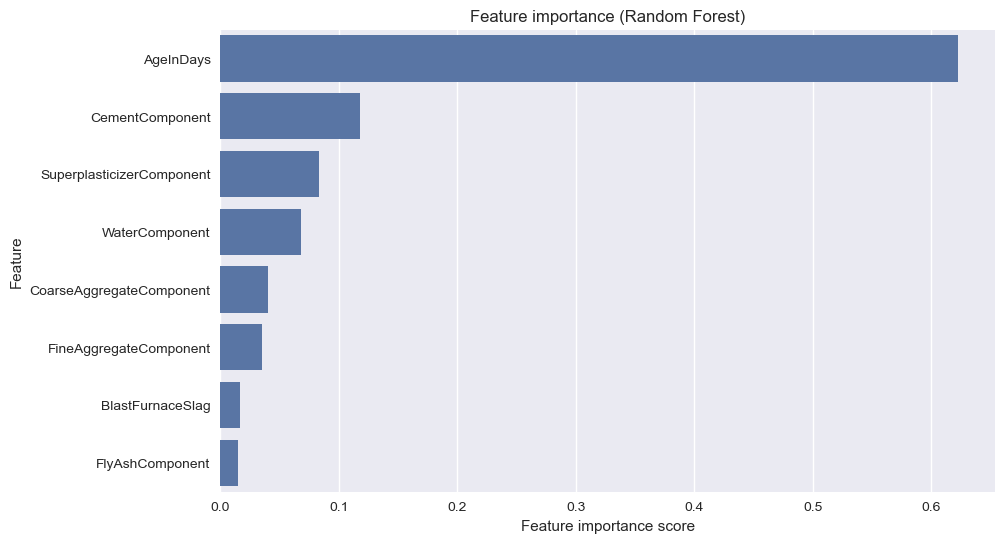


Top 5 most important features:
AgeInDays: 0.6231
CementComponent: 0.1182
SuperplasticizerComponent: 0.0836
WaterComponent: 0.0680
CoarseAggregateComponent: 0.0401

Random Foret Mode Details:
Number of features used: 8
Out-of-bag score: Not available (oob_score=false)


In [34]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Feature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title('Feature importance (Random Forest)')
plt.xlabel('Feature importance score')
plt.show()

# Show top 5 most important features
print(f"\nTop 5 most important features:")
for i, row in feature_importance.head().iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

# Additional Random Forest specific metrics
print(f"\nRandom Foret Mode Details:")
print(f"Number of features used: {rf_model.n_features_in_}")
print(f"Out-of-bag score: {rf_model.oob_score_ if hasattr(rf_model, 'oob_score_') else 'Not available (oob_score=false)'}")

Random Forest Model Analysis:
Number of trees: 100
Avrage tree depth (sample of 10 trees): 5.00
Max tree depth (sample): 5
Min tree depth (sample): 5


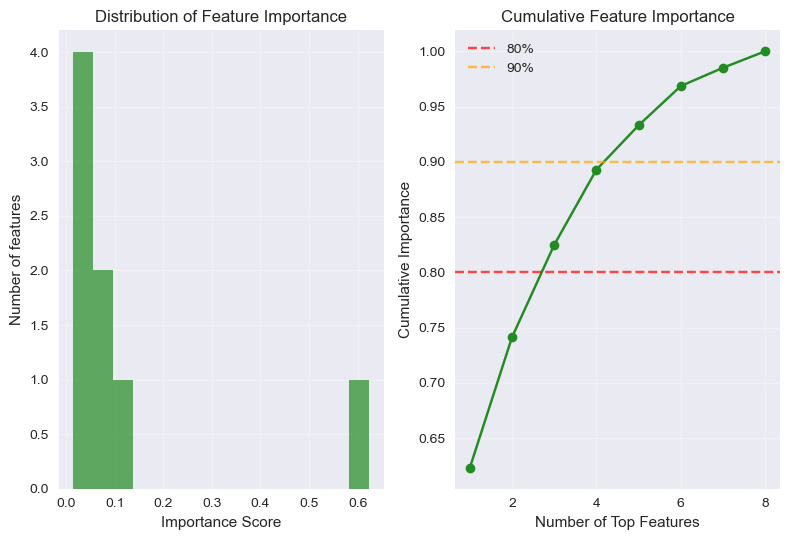


Features contributing to 80% of importance: 3
Features contributing to 90% of importance: 5


In [35]:
# Random Forest specific analysis
print("Random Forest Model Analysis:")
print(f"Number of trees: {rf_model.n_estimators}")

# Get tree depths (sample from first few trees)
tree_depths = []
for i in range(min(10, rf_model.n_estimators)):
    tree_depths.append(rf_model.estimators_[i].tree_.max_depth)

print(f"Avrage tree depth (sample of 10 trees): {np.mean(tree_depths):.2f}")
print(f"Max tree depth (sample): {max(tree_depths)}")
print(f"Min tree depth (sample): {min(tree_depths)}")

# Feature importance distribution
plt.Figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(rf_model.feature_importances_, bins=15, alpha=0.7, color='forestgreen')
plt.title("Distribution of Feature Importance")
plt.xlabel('Importance Score')
plt.ylabel('Number of features')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
cumulative_importance = np.cumsum(feature_importance['Importance'].values)
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, 'o-', color='forestgreen')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Top Features')
plt.ylabel('Cumulative Importance')
plt.grid(True, alpha=0.3)

# Add horizontal lines for reference
plt.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80%')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90%')
plt.legend()

plt.tight_layout()
plt.show()

# Find how many features contribute to 80% and 90% of importance
feature_80 = np.argmax(cumulative_importance >= 0.8) + 1
feature_90 = np.argmax(cumulative_importance >= 0.9) + 1
print(f"\nFeatures contributing to 80% of importance: {feature_80}")
print(f"Features contributing to 90% of importance: {feature_90}")

In [36]:
# Training the model on 100% data after done with initliat training and testing
rf_model.fit(X_final, y)

RandomForestRegressor(max_depth=5, n_jobs=1, random_state=42)

## 8. Make Predictions on Test Set

Use the trained model to make predictions on the test dataset.

In [37]:
# Make predictions on the test set
test_predictions = rf_model.predict(X_test_final)

print(f"Test prediction shape: {test_predictions.shape}")
print(f"\nFirst 10 test predictions:")
print(test_predictions[:10])

print(f"\nTest predictions statistics:")
print(f"Mean: {test_predictions.mean():.4f}")
print(f"Median: {np.median(test_predictions):.4f}")
print(f"Std: {test_predictions.std():.4f}")
print(f"Min: {test_predictions.min():.4f}")
print(f"Max: {test_predictions.max():.4f}")

# Check for any negative predictions (should not happen for concrete strength)
negative_predictions = (test_predictions < 0).sum()
print(f"\nNumber of negative predictions: {negative_predictions}")
if negative_predictions > 0:
    print("Warning: Random Forest produced negative predictions")

Test prediction shape: (3605,)

First 10 test predictions:
[50.05980724 19.80827448 35.79752921 47.85710542 34.98893908 37.74188373
 35.32369109 20.20224184 40.98765892 39.25205228]

Test predictions statistics:
Mean: 35.4223
Median: 36.9078
Std: 10.8444
Min: 15.3513
Max: 60.5257

Number of negative predictions: 0


## 9. Save Predictions to CSV File

Create a submission dataframe with predictions and save it to 'submission.csv' using pandas.

In [38]:
# Create submission dataframe
submission = pd.DataFrame({
    'id': test_df['id'],
    'Strength': test_predictions
})

print("Submission dataframe created:")
print(submission.head(10))
print(f"\nSubmission shape: {submission.shape}")

# Verify the format matched sample submission
print(f"\nSample submission shape: {sample_submssion.shape}")
print(f"Columns match: {list(submission.columns) == list(sample_submssion.columns)}")

Submission dataframe created:
     id   Strength
0  5407  50.059807
1  5408  19.808274
2  5409  35.797529
3  5410  47.857105
4  5411  34.988939
5  5412  37.741884
6  5413  35.323691
7  5414  20.202242
8  5415  40.987659
9  5416  39.252052

Submission shape: (3605, 2)

Sample submission shape: (3605, 2)
Columns match: True


In [39]:
# Save to a CSV file
submission.to_csv('submission_rf_2.csv', index=False)

print("Predictions saved to 'submission_rf_2.csv' successfully!")

# Verify the file was created and read it back
verification = pd.read_csv('submission_rf_2.csv')
print(f"\nVerification - File shape: {verification.shape}")
print("First 5 rows of saved file:")
print(verification.head())
print("\nLast 5 rows of saved file:")
print(verification.tail())

Predictions saved to 'submission_rf_2.csv' successfully!

Verification - File shape: (3605, 2)
First 5 rows of saved file:
     id   Strength
0  5407  50.059807
1  5408  19.808274
2  5409  35.797529
3  5410  47.857105
4  5411  34.988939

Last 5 rows of saved file:
        id   Strength
3600  9007  34.427442
3601  9008  36.589618
3602  9009  37.571814
3603  9010  29.014976
3604  9011  20.252261
